In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

# 컬럼 설명
- Age: 직원의 나이 (수치형)
- Attrition: 직원의 이직 여부 (범주형, Yes or No)
- BusinessTravel: 출장 빈도 (범주형, Non-Travel, Travel_Rarely, Travel_Frequently)
- DailyRate: 하루 일당 (수치형)
- Department: 근무 부서 (범주형, Sales, Research & Development, Human Resources)
- DistanceFromHome: 직원의 집과 회사 사이 거리 (수치형)
- Education: 교육 수준 (수치형, 1 - Below College, 2 - College, 3 - Bachelor, 4 - Master, 5 - Doctor)
- EducationField: 전공 분야 (범주형, Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other)
- EmployeeCount: 직원 수 (상수)
- EmployeeNumber: 직원 번호 (수치형)
- EnvironmentSatisfaction: 업무 환경 만족도 (수치형, 1 - Low, 2 - Medium, 3 - High, 4 - Very High)
- Gender: 성별 (범주형, Male or Female)
- HourlyRate: 시간당 임금 (수치형)
- JobInvolvement: 업무 참여도 (수치형, 1 - Low, 2 - Medium, 3 - High, 4 - Very High)
- JobLevel: 직무 레벨 (수치형)
- JobRole: 직무 (범주형, Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)
- JobSatisfaction: 업무 만족도 (수치형, 1 - Low, 2 - Medium, 3 - High, 4 - Very High)
- MaritalStatus: 결혼 여부 (범주형, Married, Single, Divorced)
- MonthlyIncome: 월급 (수치형)
- MonthlyRate: 월별 일한 시간 (수치형)
- NumCompaniesWorked: 근무한 회사 수 (수치형)
- Over18: 만 18세 이상 여부 (범주형, Y)
- OverTime: 야근 여부 (범주형, Yes or No)
- PercentSalaryHike: 급여 인상률 (수치형)
- PerformanceRating: 업무 성과 평가 (수치형, 1 - Low, 2 - Good, 3 - Excellent, 4 - Outstanding)
- RelationshipSatisfaction: 대인관계 만족도 (수치형, 1 - Low, 2 - Medium, 3 - High, 4 - Very High)
- RelationshipSatisfaction: 대인관계 만족도 (수치형, 1 - Low, 2 - Medium, 3 - High, 4 - Very High)
- StandardHours: 주당 근무 시간 (상수, 모두 80)
- StockOptionLevel: 주식 옵션 수준 (수치형, 0 - No Stock Options, 1 - Less Than 1, 2 - 1 or More, 3 - 2 or More)
- TotalWorkingYears: 총 근무 연수 (수치형)
- TrainingTimesLastYear: 지난 해 교육 횟수 (수치형)
- WorkLifeBalance: 업무와 삶의 균형 (수치형, 1 - Bad, 2 - Good, 3 - Better, 4 - Best)
- YearsAtCompany: 회사 근속 연수 (수치형)
- YearsInCurrentRole: 현재 직무 근속 연수 (수치형)
- YearsSinceLastPromotion: 마지막 진급 후 경과 연수 (수치형)
- YearsWithCurrManager: 현재 매니저와 근무한 연수 (수치형)

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")

In [3]:
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [4]:
df_raw.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [5]:
# 불필요 컬럼 삭제
df_raw = df_raw.drop(columns=["Over18", "EmployeeCount", "StandardHours", "DailyRate", "HourlyRate", "MonthlyRate"])

In [6]:
# 라벨 인코딩
# Object 컬럼
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [7]:
# 깊은 복사
df_encoded = df_raw.copy(deep=True)

#Scikit-learn 사용해서 라벨 인코딩하기
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df_encoded[col] = lab_enc.fit_transform(df_raw[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [8]:
df_encoded

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,2,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
2,49,0,1,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
4,37,1,2,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
5,33,0,1,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
7,27,0,2,1,2,1,3,1,1,3,1,2,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,1,1,23,2,3,3,1,4,2,2,4,1,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
2062,39,0,2,1,6,1,3,4,1,2,3,0,1,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
2064,27,0,2,1,4,3,1,2,1,4,2,4,2,1,6142,1,1,20,4,2,1,6,0,3,6,2,0,3


In [9]:
# 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [10]:
df_scaled

array([[0.54761905, 1.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.        , 0.5       , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.        , 0.5       , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [11]:
df_scaled = pd.DataFrame(data=df_scaled, columns=df_encoded.columns)

In [12]:
df_scaled.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
Department,-0.031882,0.063991,-0.009044,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
JobInvolvement,0.029820,-0.130016,0.039062,-0.024586,0.008783,0.042438,-0.002655,-0.008278,0.017960,1.000000,-0.012630,0.006616,-0.021476,-0.038497,-0.015271,0.015012,-0.003507,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


## 퇴사자 기준 특이점 파악
* 퇴사자 vs 재직자 현황
* 어느 나이대가 퇴사자가 많은가? (퇴직자의 주요 나이층)
* 어느 부서의 퇴사자가 많은가?
* 어느 교육 등급의 퇴사자가 많은가?
* 퇴사자들의 주요 출근 거리는?
* 퇴사자들의 만족도 현황
* 퇴자자들의 직책은?
* 퇴사자들의 수입은

In [13]:
# 퇴사자 특성 파악
attrition_yes = df_raw[df_raw["Attrition"] == "Yes"]
attrition_no = df_raw[df_raw["Attrition"] == "No"]

In [14]:
# 퇴사자 정규화
attrition_yes_sc = df_scaled[df_scaled["Attrition"] == 1]
attrition_no_sc = df_scaled[df_scaled["Attrition"] == 0]

In [15]:
df_raw[["MonthlyIncome", "PercentSalaryHike", "StockOptionLevel"]].describe()

,MonthlyIncome,PercentSalaryHike,StockOptionLevel
count,1470.000000,1470.000000,1470.000000
mean,6502.931293,15.209524,0.793878
std,4707.956783,3.659938,0.852077
min,1009.000000,11.000000,0.000000
25%,2911.000000,12.000000,0.000000
50%,4919.000000,14.000000,1.000000
75%,8379.000000,18.000000,1.000000
max,19999.000000,25.000000,3.000000


In [16]:
attrition_no[["MonthlyIncome", "PercentSalaryHike", "StockOptionLevel"]].describe()

,MonthlyIncome,PercentSalaryHike,StockOptionLevel
count,1233.000000,1233.000000,1233.000000
mean,6832.739659,15.231144,0.845093
std,4818.208001,3.639511,0.841985
min,1051.000000,11.000000,0.000000
25%,3211.000000,12.000000,0.000000
50%,5204.000000,14.000000,1.000000
75%,8834.000000,18.000000,1.000000
max,19999.000000,25.000000,3.000000


In [17]:
# 퇴사자 
attrition_yes[["MonthlyIncome", "PercentSalaryHike", "StockOptionLevel"]].describe()

,MonthlyIncome,PercentSalaryHike,StockOptionLevel
count,237.000000,237.000000,237.000000
mean,4787.092827,15.097046,0.527426
std,3640.210367,3.770294,0.856361
min,1009.000000,11.000000,0.000000
25%,2373.000000,12.000000,0.000000
50%,3202.000000,14.000000,0.000000
75%,5916.000000,17.000000,1.000000
max,19859.000000,25.000000,3.000000


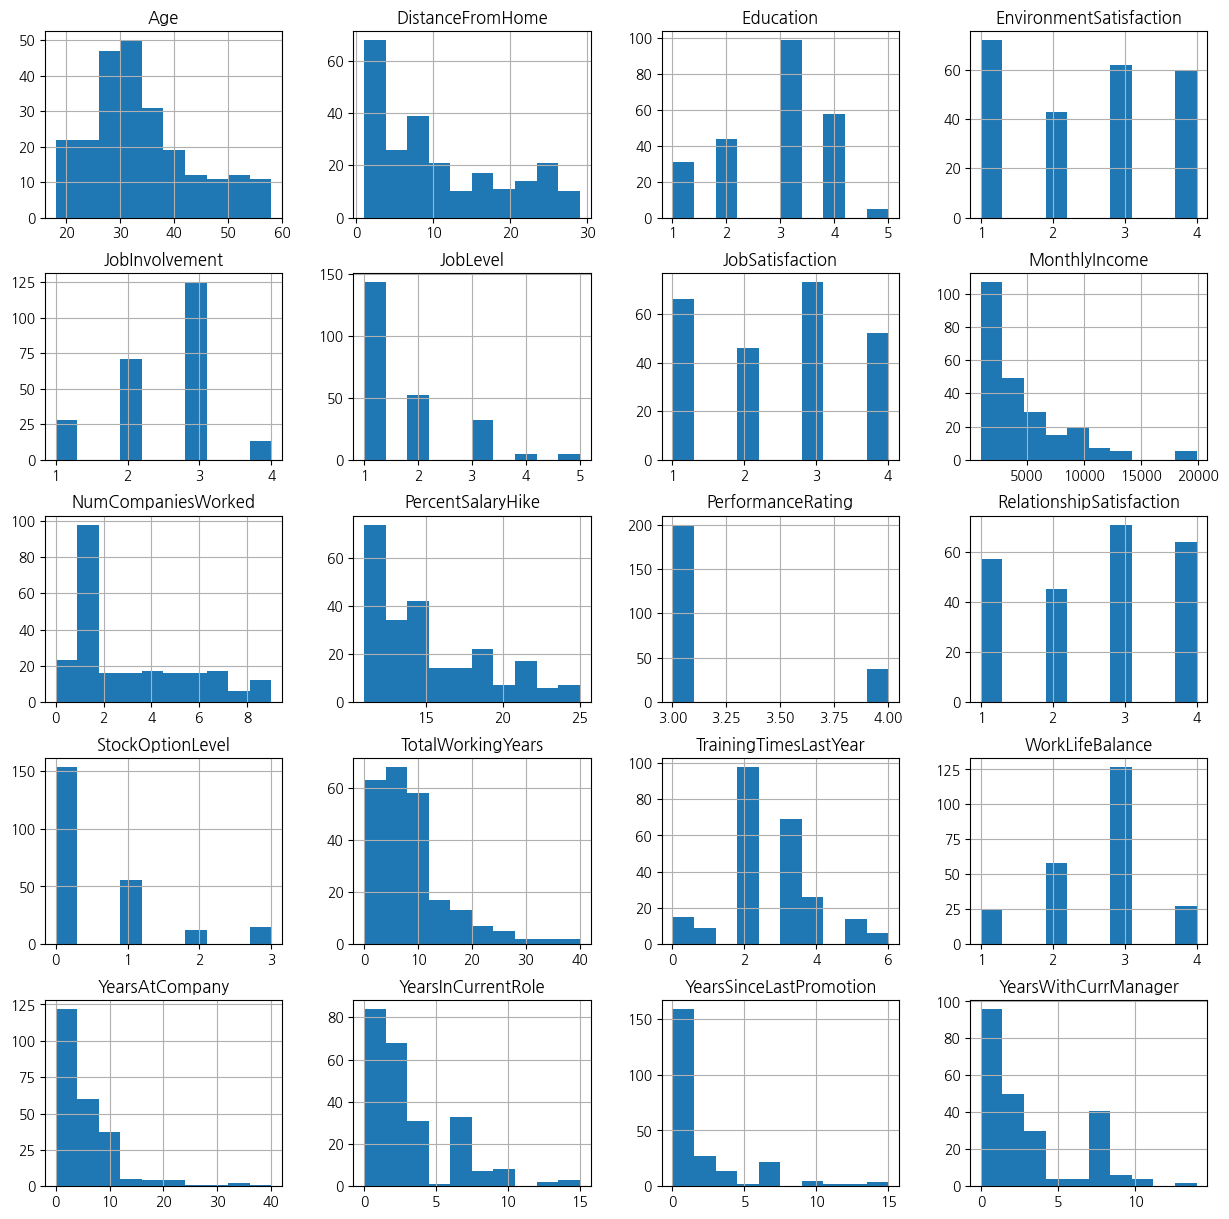

In [18]:
# 퇴사자 히스토그램
attrition_yes.hist(figsize=(15,15));

In [19]:
# 퇴사자 237명 -> 16%
df_raw["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

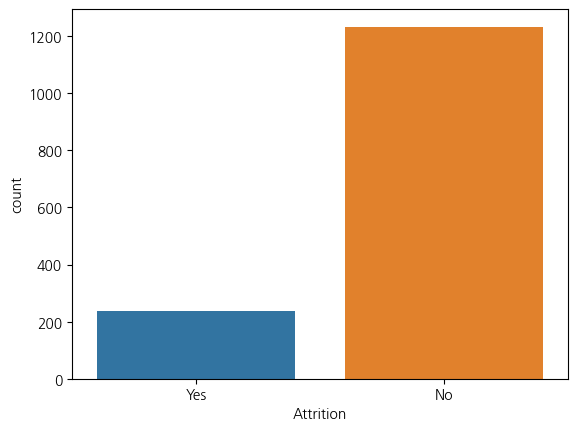

In [20]:
# 퇴사자 vs 재직자 현황 시각화
sns.countplot(df_raw, x="Attrition")

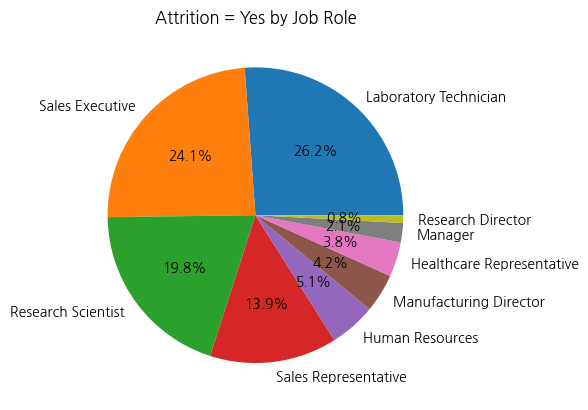

In [21]:
# JobRole에 따른 Attrition = Yes인 직원의 수 계산
job_role_counts = attrition_yes['JobRole'].value_counts()

plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%')
plt.title('Attrition = Yes by Job Role')
plt.show()

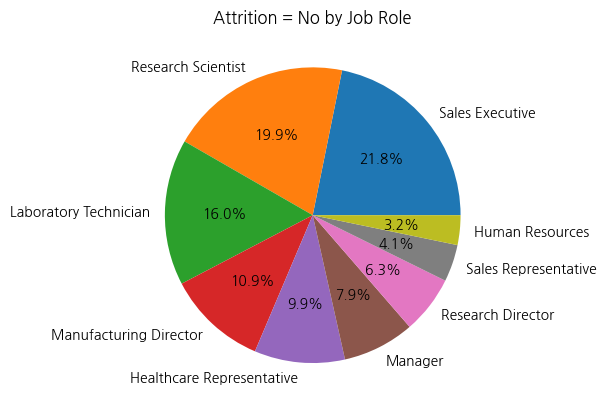

In [22]:
# JobRole에 따른 Attrition = No인 직원의 수 계산
job_role_counts = attrition_no['JobRole'].value_counts()

plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%')
plt.title('Attrition = No by Job Role')
plt.show()

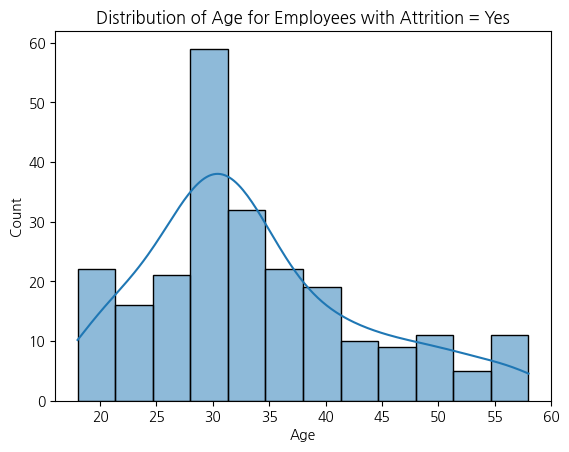

In [23]:
# 퇴직자 연령 분포 시각화
sns.histplot(data=attrition_yes, x='Age', kde=True)
plt.title('Distribution of Age for Employees with Attrition = Yes')
plt.show()

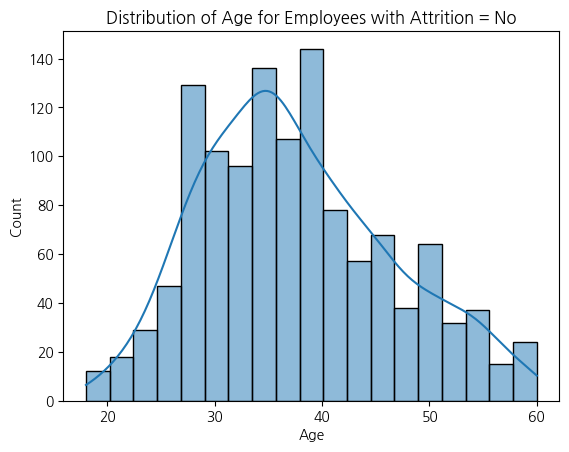

In [24]:
# 재직자 연령 분포 시각화
sns.histplot(data=attrition_no, x='Age', kde=True)
plt.title('Distribution of Age for Employees with Attrition = No')
plt.show()

<Axes: xlabel='Department', ylabel='count'>

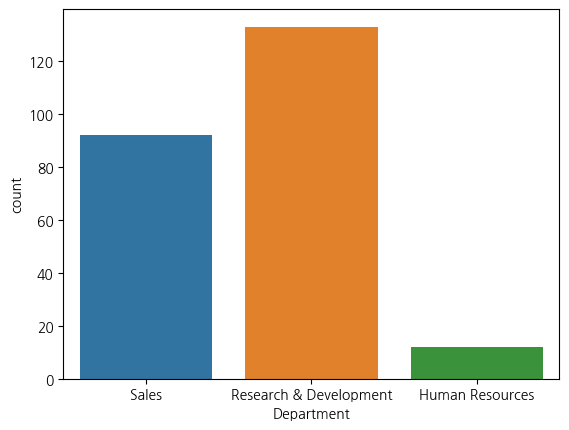

In [25]:
# 부서별 퇴직자 현황
sns.countplot(attrition_yes, x="Department")

<Axes: xlabel='Department', ylabel='count'>

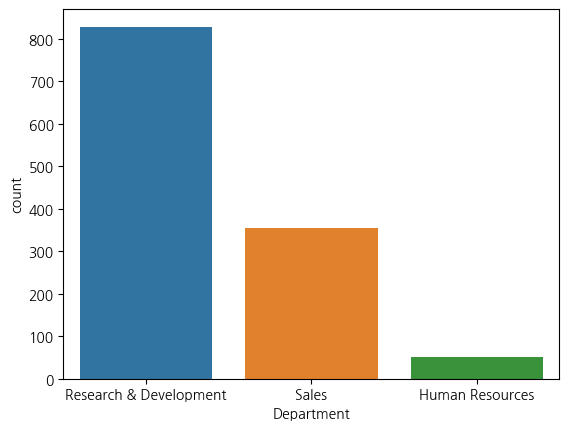

In [26]:
# 부서별 재직자 현황
sns.countplot(attrition_no, x="Department")

<Axes: xlabel='JobLevel', ylabel='count'>

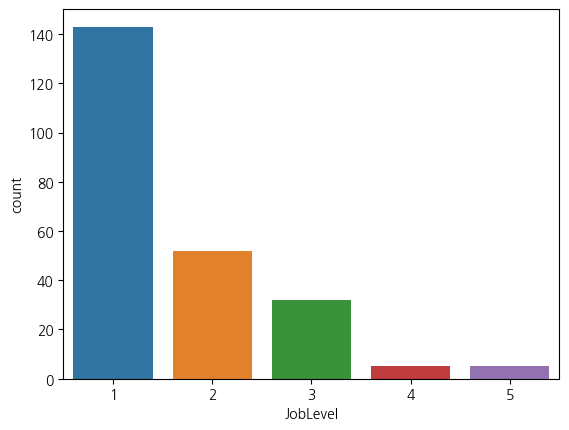

In [27]:
# 퇴직자 joblevel 
sns.countplot(attrition_yes, x="JobLevel")

<Axes: xlabel='JobLevel', ylabel='count'>

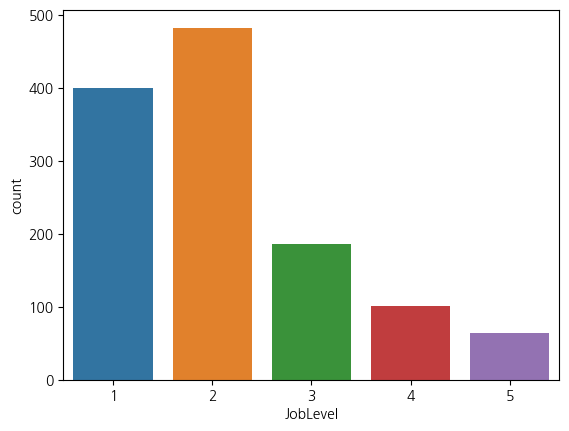

In [28]:
# 재직자 joblevel 
sns.countplot(attrition_no, x="JobLevel")

<Axes: xlabel='DistanceFromHome', ylabel='count'>

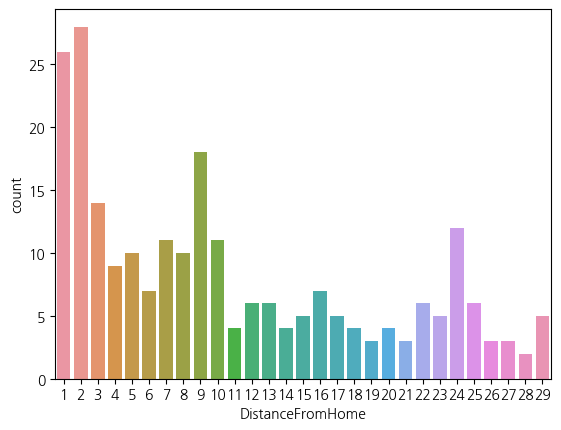

In [29]:
# 퇴직자 통근거리
sns.countplot(attrition_yes, x="DistanceFromHome")

<Axes: xlabel='DistanceFromHome', ylabel='count'>

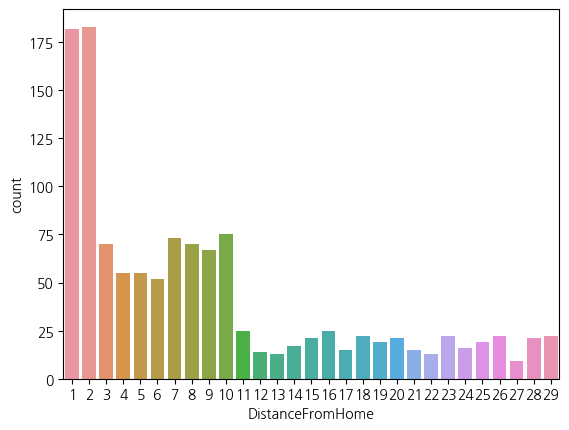

In [30]:
# 재직자 통근거리
sns.countplot(attrition_no, x="DistanceFromHome")

<Axes: xlabel='JobSatisfaction', ylabel='count'>

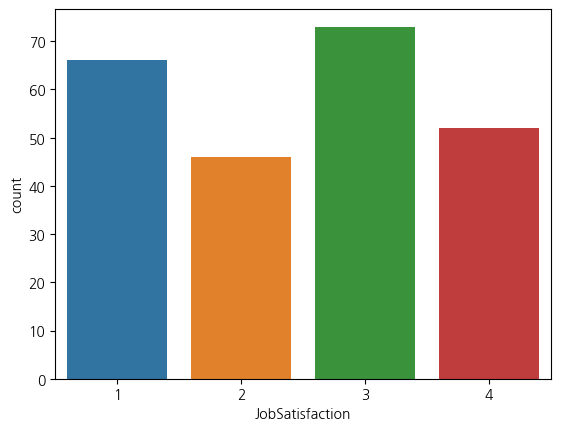

In [31]:
# 퇴직자 만족도
sns.countplot(attrition_yes, x="JobSatisfaction")

<Axes: xlabel='JobSatisfaction', ylabel='count'>

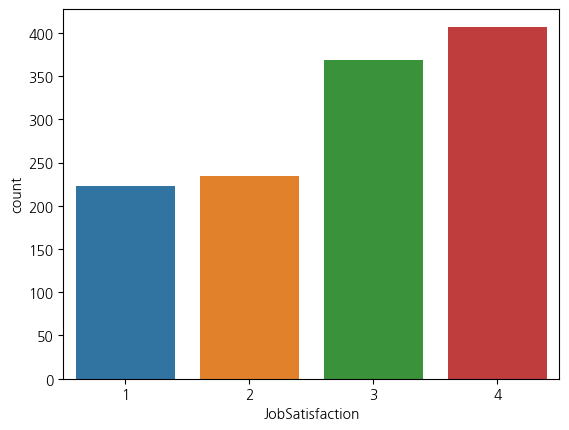

In [32]:
# 재직자 만족도
sns.countplot(attrition_no, x="JobSatisfaction")

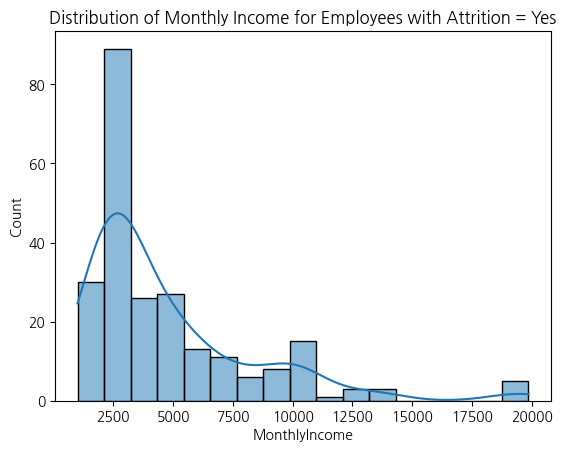

In [33]:
# 퇴직자 월간 수익률 분포 시각화
sns.histplot(data=attrition_yes, x='MonthlyIncome', kde=True)
plt.title('Distribution of Monthly Income for Employees with Attrition = Yes')
plt.show()

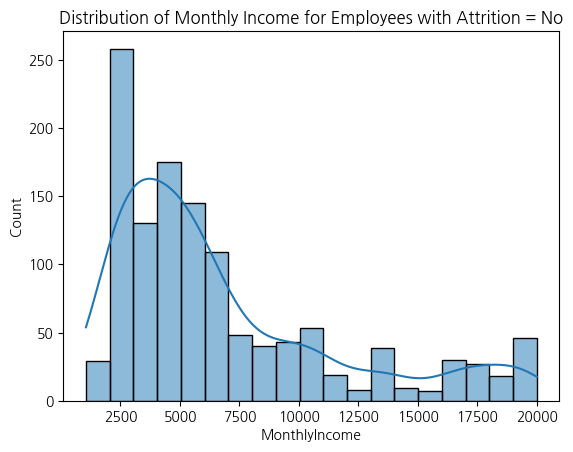

In [34]:
# 재직자 월간 수익률 분포 시각화
sns.histplot(data=attrition_no, x='MonthlyIncome', kde=True)
plt.title('Distribution of Monthly Income for Employees with Attrition = No')
plt.show()

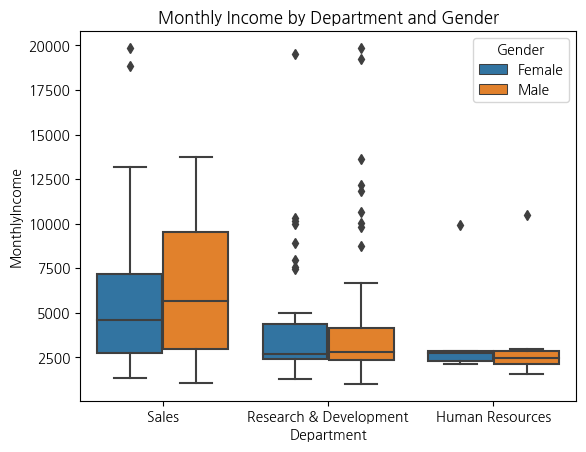

In [35]:
# Department에 따른 퇴작자 연간 수익률 분포 비교
sns.boxplot(data=attrition_yes, x='Department', y='MonthlyIncome', hue='Gender')
plt.title('Monthly Income by Department and Gender')
plt.show()

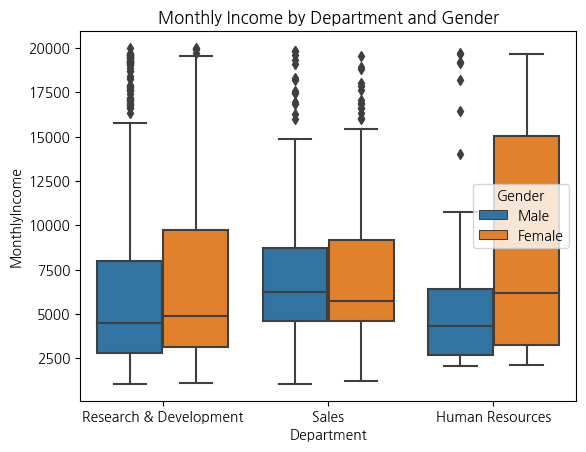

In [36]:
# Department에 따른 재작자 연간 수익률 분포 비교
sns.boxplot(data=attrition_no, x='Department', y='MonthlyIncome', hue='Gender')
plt.title('Monthly Income by Department and Gender')
plt.show()

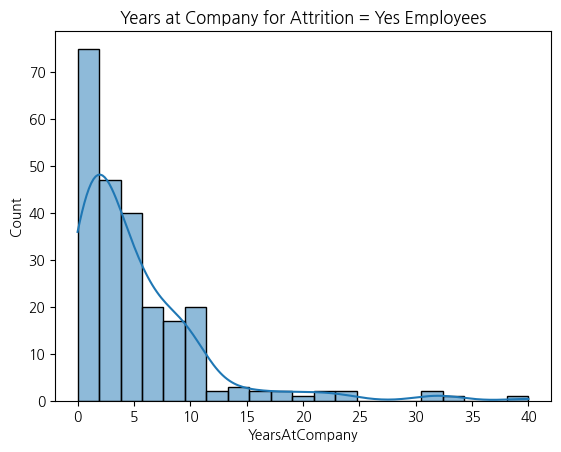

In [37]:
# 퇴직자 근무기간 분석
sns.histplot(data=attrition_yes, x='YearsAtCompany', kde=True)
plt.title('Years at Company for Attrition = Yes Employees')
plt.show()

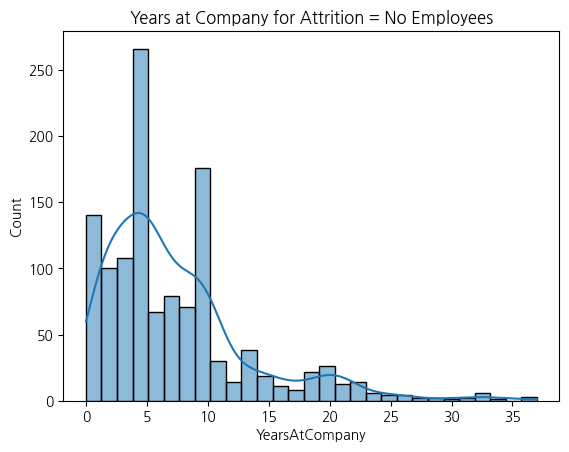

In [38]:
# 재직자 근무기간 분석
sns.histplot(data=attrition_no, x='YearsAtCompany', kde=True)
plt.title('Years at Company for Attrition = No Employees')
plt.show()

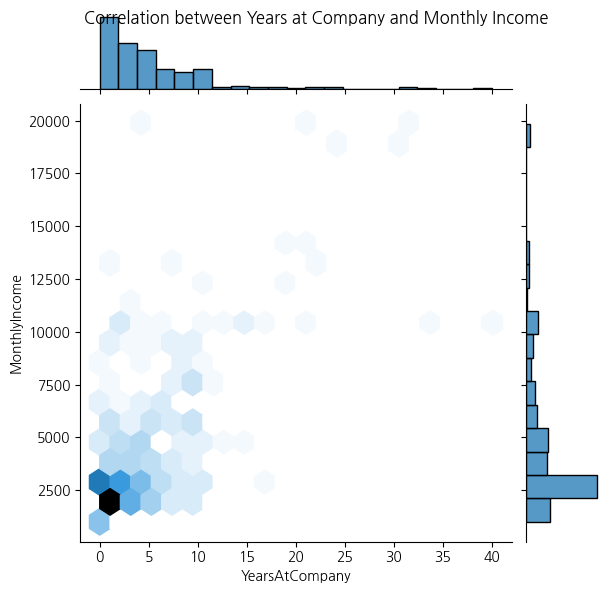

In [39]:
# 퇴직자의 근속기간과 연간 수익률 시각화
sns.jointplot(data=attrition_yes, x='YearsAtCompany', y='MonthlyIncome', kind='hex')
plt.suptitle('Correlation between Years at Company and Monthly Income')
plt.show()

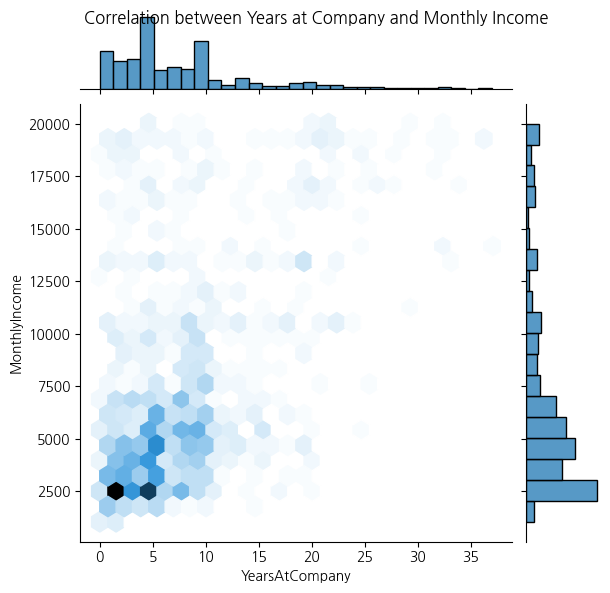

In [40]:
# 재직자의 근속기간과 연간 수익률 시각화
sns.jointplot(data=attrition_no, x='YearsAtCompany', y='MonthlyIncome', kind='hex')
plt.suptitle('Correlation between Years at Company and Monthly Income')
plt.show()

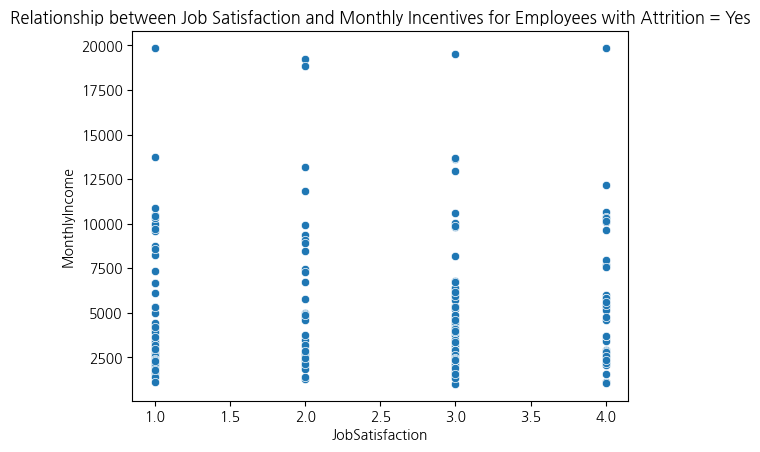

In [41]:
# 퇴직자 직무 만족도와 연간 인센티브 관계 시각화
sns.scatterplot(data=attrition_yes, x='JobSatisfaction', y='MonthlyIncome')
plt.title('Relationship between Job Satisfaction and Monthly Incentives for Employees with Attrition = Yes')
plt.show()

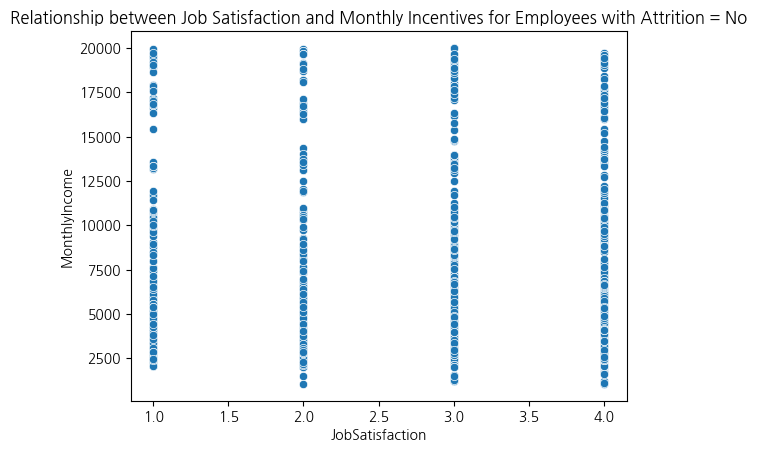

In [42]:
# 재직자 직무 만족도와 연간 인센티브 관계 시각화
sns.scatterplot(data=attrition_no, x='JobSatisfaction', y='MonthlyIncome')
plt.title('Relationship between Job Satisfaction and Monthly Incentives for Employees with Attrition = No')
plt.show()

## (보상) MonthlyIncome, PercentSalaryHike, StockOptionLevel

⇒ 각각의 보상은 퇴사율을 낮추는데 기여하고 있는가? 적절한 보상 범위는 얼만큼일까?
연봉인상은 퇴사율에 영향을 미쳤을까?

### MonthlyIncome

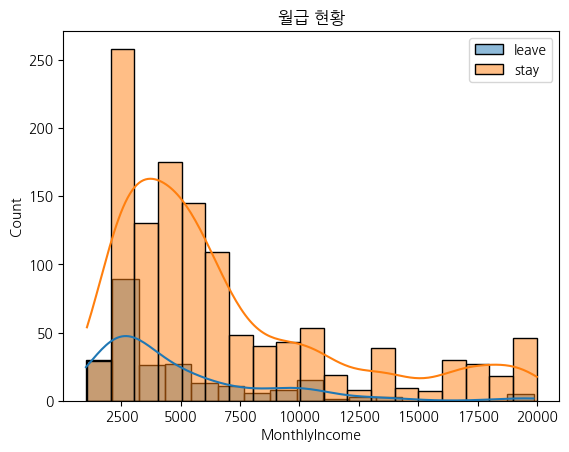

In [43]:
# sns.histplot(data=df_raw, x="MonthlyIncome", y="Attrition", kde=True, label="All")
sns.histplot(data=attrition_yes, x="MonthlyIncome",kde=True, label = "leave")
sns.histplot(data=attrition_no, x="MonthlyIncome",kde=True, label = "stay")
plt.title('월급 현황')
plt.legend()
plt.show();

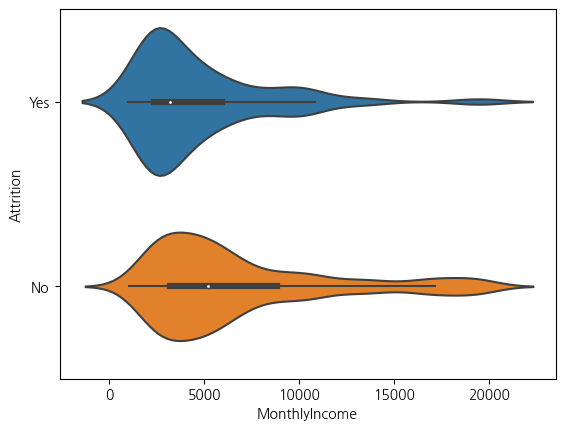

In [44]:
sns.violinplot(data=df_raw, x="MonthlyIncome", y="Attrition")
plt.show();

### PercentSalaryHike

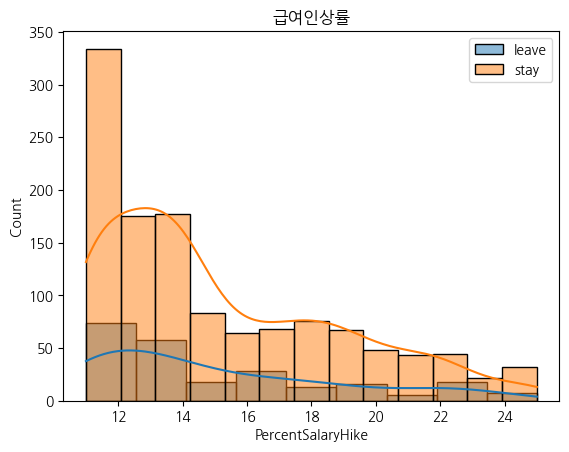

In [45]:
# sns.histplot(data=df_raw, x="PercentSalaryHike",y="Attrition", kde=True, label="All")
sns.histplot(data=attrition_yes, x="PercentSalaryHike",kde=True, label = "leave")
sns.histplot(data=attrition_no, x="PercentSalaryHike",kde=True, label = "stay")
plt.title('급여인상률')
plt.legend()
plt.show();

<Axes: xlabel='PercentSalaryHike', ylabel='Attrition'>

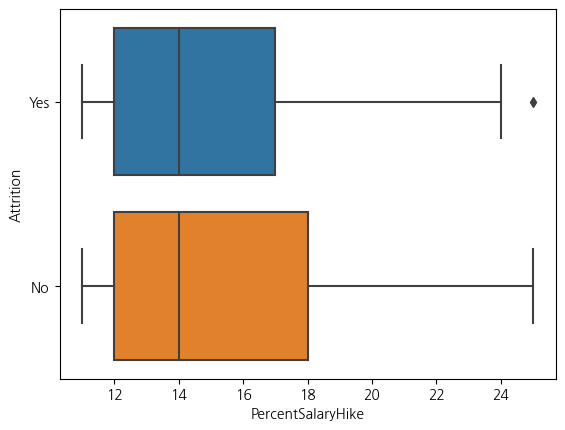

In [46]:
sns.boxplot(data=df_raw, x="PercentSalaryHike", y="Attrition")

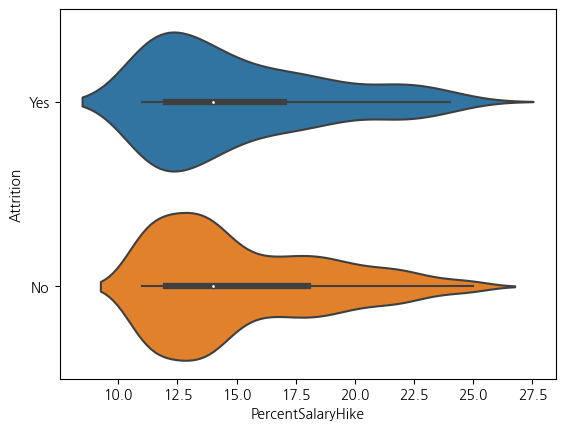

In [47]:
sns.violinplot(data=df_raw, x="PercentSalaryHike", y="Attrition")
plt.show();

### StockOptionLevel

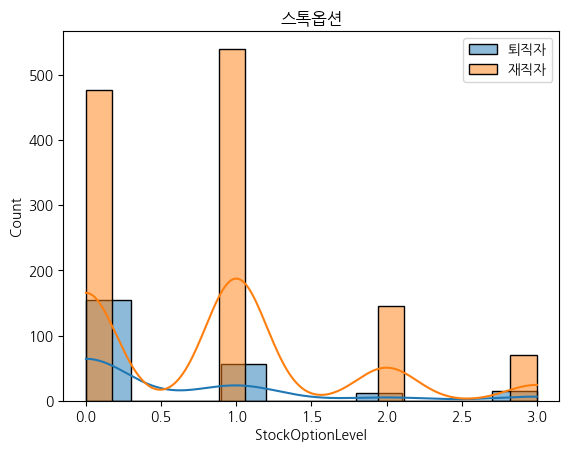

In [48]:
# sns.histplot(data=df_raw, x="StockOptionLevel",kde=True, label="All")
sns.histplot(data=attrition_yes, x="StockOptionLevel",kde=True, label = "퇴직자")
sns.histplot(data=attrition_no, x="StockOptionLevel",kde=True, label = "재직자")
plt.title('스톡옵션')
plt.legend()
plt.show();

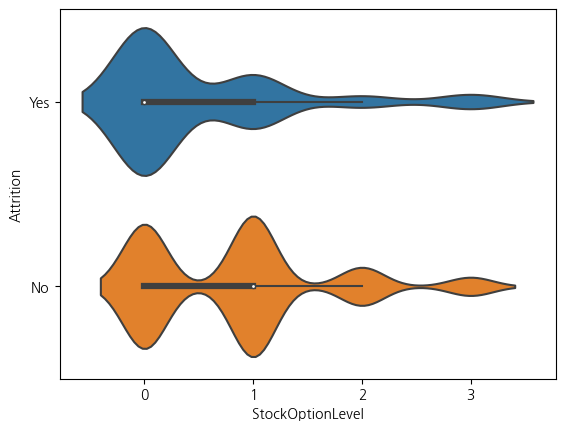

In [49]:
sns.violinplot(data=df_raw, x="StockOptionLevel", y="Attrition")
plt.show();

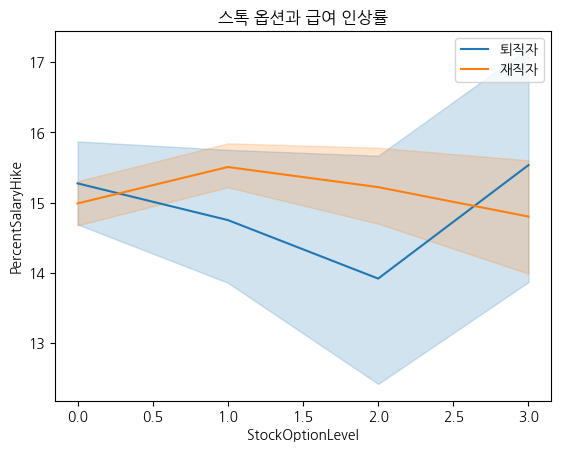

In [50]:
# 스톡옵션 - 급여 인상률
sns.lineplot(data=attrition_yes, x="StockOptionLevel",y="PercentSalaryHike", label="퇴직자")
sns.lineplot(data=attrition_no, x="StockOptionLevel",y="PercentSalaryHike", label="재직자")
plt.title('스톡 옵션과 급여 인상률')
plt.legend()
plt.show();

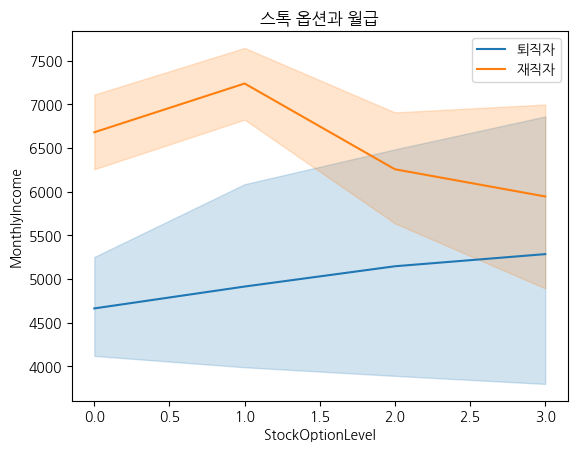

In [51]:
# 스톡옵션 - 월급
sns.lineplot(data=attrition_yes, x="StockOptionLevel",y="MonthlyIncome", label="퇴직자")
sns.lineplot(data=attrition_no, x="StockOptionLevel",y="MonthlyIncome", label="재직자")
plt.title('스톡 옵션과 월급')
plt.legend()
plt.show();

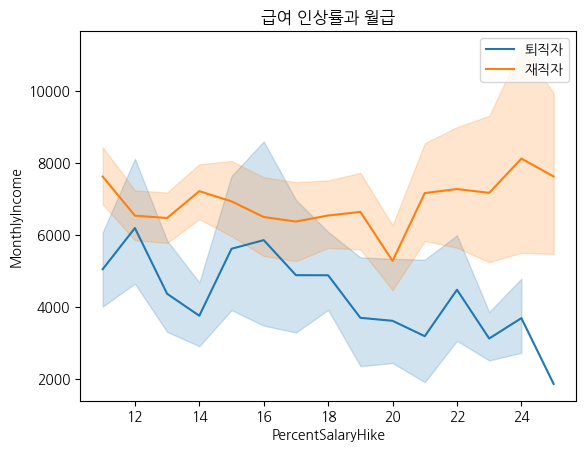

In [52]:
# 급여 인상률 - 월급
sns.lineplot(data=attrition_yes, x="PercentSalaryHike",y="MonthlyIncome", label="퇴직자")
sns.lineplot(data=attrition_no, x="PercentSalaryHike",y="MonthlyIncome", label="재직자")
plt.title('급여 인상률과 월급')
plt.legend()
plt.show();

### 상관 계수를 통한 분석
- MonthlyIncome : TotalWorkingYears, 0.77
- PercentSalaryHike : PerformanceRating, 0.77
- StockOptionLevel : YearsInCurrentRole, 0.05

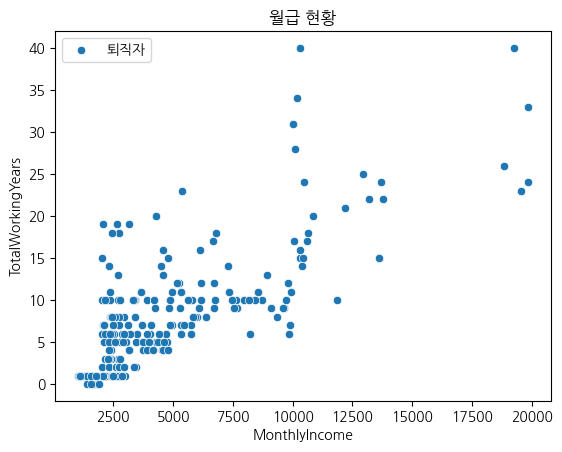

In [53]:
# MonthlyIncome : TotalWorkingYears, 0.77
sns.scatterplot(data=attrition_yes, x="MonthlyIncome",y="TotalWorkingYears", label="퇴직자")
# sns.histplot(data=attrition_no, x="MonthlyIncome",y="TotalWorkingYears", label="재직자")
plt.title('월급 현황')
plt.legend()
plt.show();

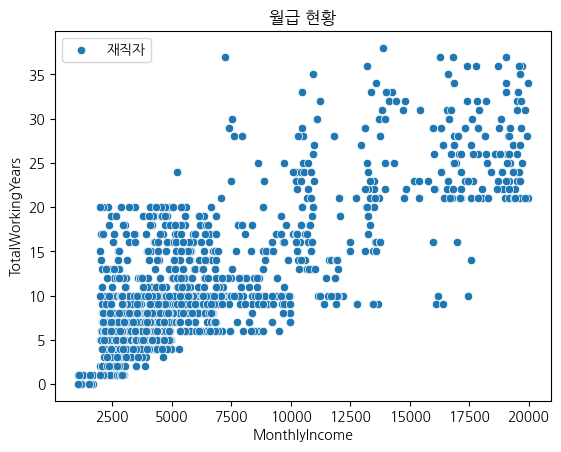

In [54]:
sns.scatterplot(data=attrition_no, x="MonthlyIncome",y="TotalWorkingYears", label="재직자")
plt.title('월급 현황')
plt.legend()
plt.show();

### 정규화

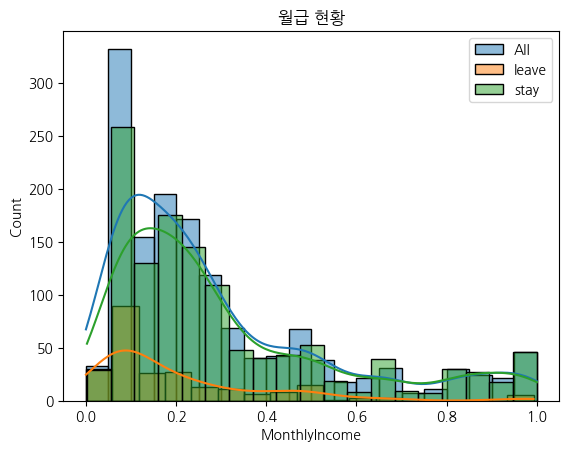

In [55]:
sns.histplot(data=df_scaled, x="MonthlyIncome",kde=True, label="All")
sns.histplot(data=attrition_yes_sc, x="MonthlyIncome",kde=True, label = "leave")
sns.histplot(data=attrition_no_sc, x="MonthlyIncome",kde=True, label = "stay")
plt.title('월급 현황')
plt.legend()
plt.show();

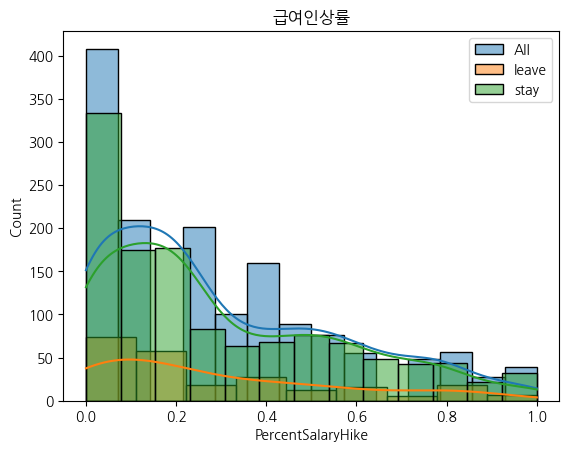

In [56]:
sns.histplot(data=df_scaled, x="PercentSalaryHike",kde=True, label="All")
sns.histplot(data=attrition_yes_sc, x="PercentSalaryHike",kde=True, label = "leave")
sns.histplot(data=attrition_no_sc, x="PercentSalaryHike",kde=True, label = "stay")
plt.title('급여인상률')
plt.legend()
plt.show();

## (성과) JobInvolvement, PerformanceRating, YearsSinceLastPromotion 승민

⇒ 성과를 잘 내는 직원의 특징은 뭘까? 성과를 잘내는 직원의 퇴사율은? 성과가 애초에 잘 측정된 것이긴 할까?(한국과 다르게 미국은 칼 같으려나..)

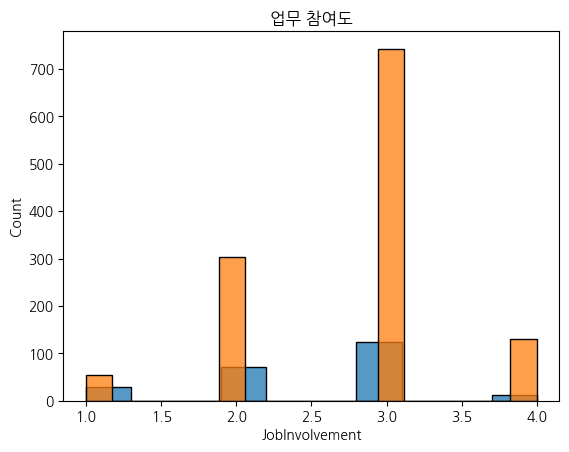

In [57]:
# 재직자 JobInvolvement 분포 시각화
sns.histplot(data=attrition_yes, x='JobInvolvement', label="퇴사자")
sns.histplot(data=attrition_no, x='JobInvolvement', label="재직자")
plt.title('업무 참여도')
plt.show()

In [58]:
df_raw["JobInvolvement"].value_counts(1)

3    0.590476
2    0.255102
4    0.097959
1    0.056463
Name: JobInvolvement, dtype: float64

In [59]:
attrition_yes["JobInvolvement"].value_counts(1)

3    0.527426
2    0.299578
1    0.118143
4    0.054852
Name: JobInvolvement, dtype: float64

In [60]:
attrition_no["JobInvolvement"].value_counts(1)

3    0.602595
2    0.246553
4    0.106245
1    0.044607
Name: JobInvolvement, dtype: float64

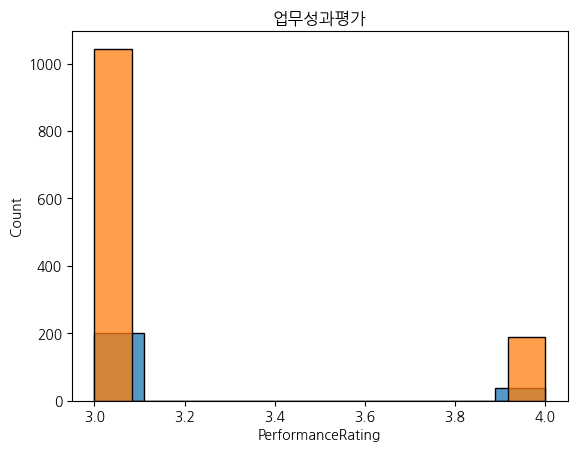

In [61]:
# 퇴직자 PerformanceRating 분포 시각화
sns.histplot(data=attrition_yes, x='PerformanceRating', label="퇴직자")
sns.histplot(data=attrition_no, x='PerformanceRating', label="재직자")
plt.title('업무성과평가')
plt.show()

In [62]:
df_raw["PerformanceRating"].value_counts(1)

3    0.846259
4    0.153741
Name: PerformanceRating, dtype: float64

In [63]:
attrition_yes["PerformanceRating"].value_counts(1)

3    0.843882
4    0.156118
Name: PerformanceRating, dtype: float64

In [64]:
attrition_no["PerformanceRating"].value_counts(1)

3    0.846715
4    0.153285
Name: PerformanceRating, dtype: float64

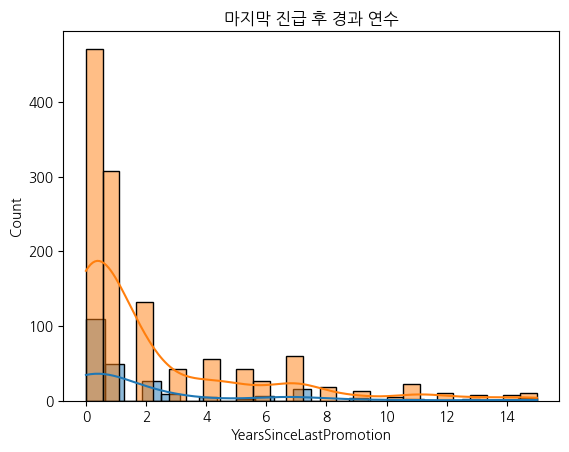

In [65]:
# 퇴직자 YearsSinceLastPromotion 분포 시각화
sns.histplot(data=attrition_yes, x='YearsSinceLastPromotion', kde=True, label="퇴직자")
sns.histplot(data=attrition_no, x='YearsSinceLastPromotion', kde=True, label="재직자")
plt.title('마지막 진급 후 경과 연수')
plt.show()

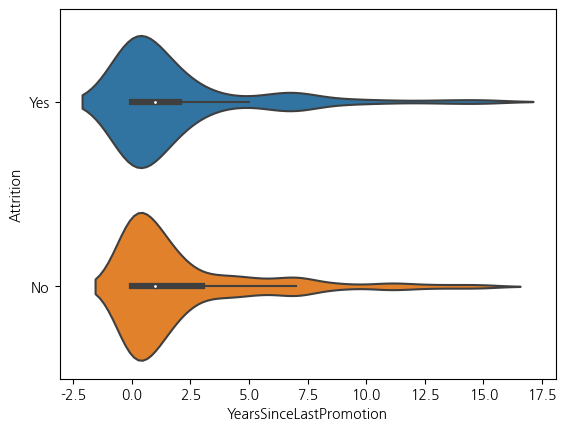

In [66]:
sns.violinplot(data=df_raw, x="YearsSinceLastPromotion", y="Attrition")
plt.show();

In [67]:
df_raw["YearsSinceLastPromotion"].value_counts(1)

0     0.395238
1     0.242857
2     0.108163
7     0.051701
4     0.041497
3     0.035374
5     0.030612
6     0.021769
11    0.016327
8     0.012245
9     0.011565
15    0.008844
13    0.006803
12    0.006803
14    0.006122
10    0.004082
Name: YearsSinceLastPromotion, dtype: float64

In [68]:
attrition_yes["YearsSinceLastPromotion"].value_counts(1)

0     0.464135
1     0.206751
2     0.113924
7     0.067511
3     0.037975
6     0.025316
4     0.021097
9     0.016878
15    0.012658
13    0.008439
11    0.008439
5     0.008439
10    0.004219
14    0.004219
Name: YearsSinceLastPromotion, dtype: float64

In [69]:
attrition_no["YearsSinceLastPromotion"].value_counts(1)

0     0.381995
1     0.249797
2     0.107056
7     0.048662
4     0.045418
3     0.034874
5     0.034874
6     0.021087
11    0.017843
8     0.014599
9     0.010543
12    0.008110
15    0.008110
13    0.006488
14    0.006488
10    0.004055
Name: YearsSinceLastPromotion, dtype: float64

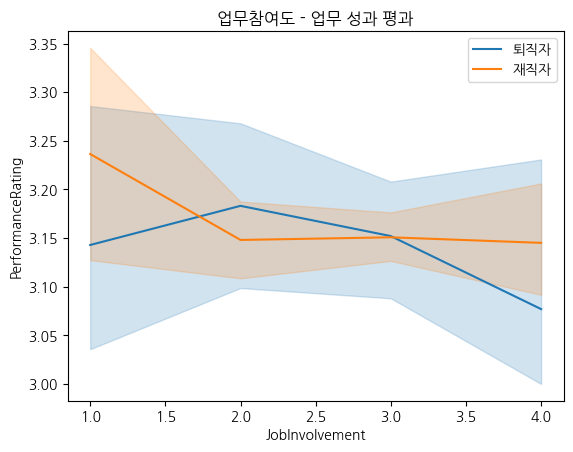

In [70]:
# 업무참여도 - 업무 성과 평가 관계
sns.lineplot(data=attrition_yes, x='JobInvolvement', y="PerformanceRating", label="퇴직자")
sns.lineplot(data=attrition_no, x='JobInvolvement', y="PerformanceRating", label="재직자")
plt.title('업무참여도 - 업무 성과 평과')
plt.show()

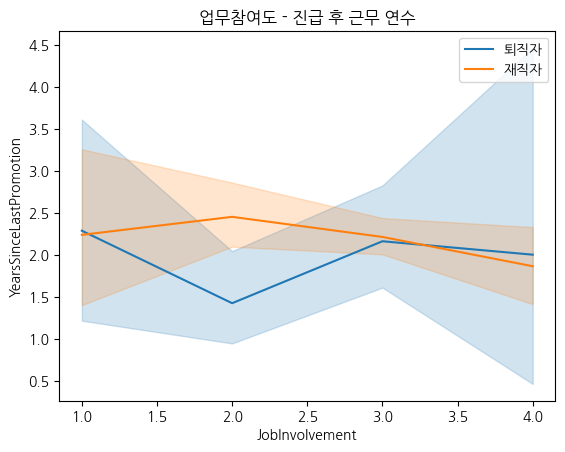

In [71]:
# 업무참여도 - 진급 후 근무 연수 관계
sns.lineplot(data=attrition_yes, x='JobInvolvement', y="YearsSinceLastPromotion", label="퇴직자")
sns.lineplot(data=attrition_no, x='JobInvolvement', y="YearsSinceLastPromotion", label="재직자")
plt.title('업무참여도 - 진급 후 근무 연수')
plt.show()

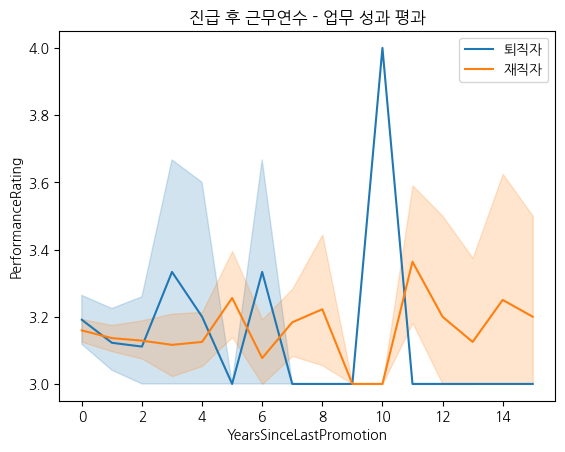

In [72]:
# 진급 후 근무 연수 - 업무 성과 평가 관계
sns.lineplot(data=attrition_yes, x='YearsSinceLastPromotion', y="PerformanceRating", label="퇴직자")
sns.lineplot(data=attrition_no, x='YearsSinceLastPromotion', y="PerformanceRating", label="재직자")
plt.title('진급 후 근무연수 - 업무 성과 평과')
plt.show()

- MonthlyIncome
- JobInvolvement
- StockOptionLevel
- overtime

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

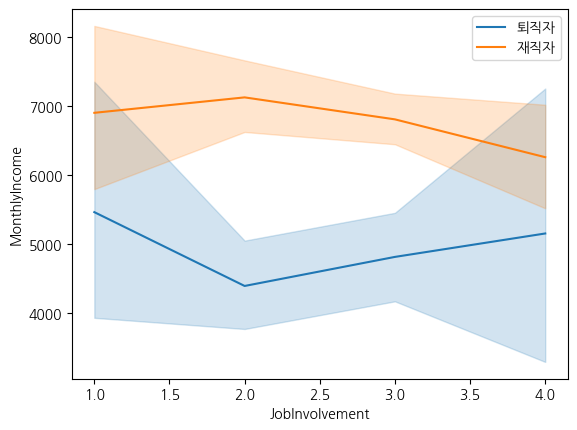

In [74]:
sns.lineplot(data=attrition_yes, x='JobInvolvement', y="MonthlyIncome", label="퇴직자")
sns.lineplot(data=attrition_no, x='JobInvolvement', y="MonthlyIncome", label="재직자")

C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\680386760.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\680386760.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\680386760.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\680386760.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




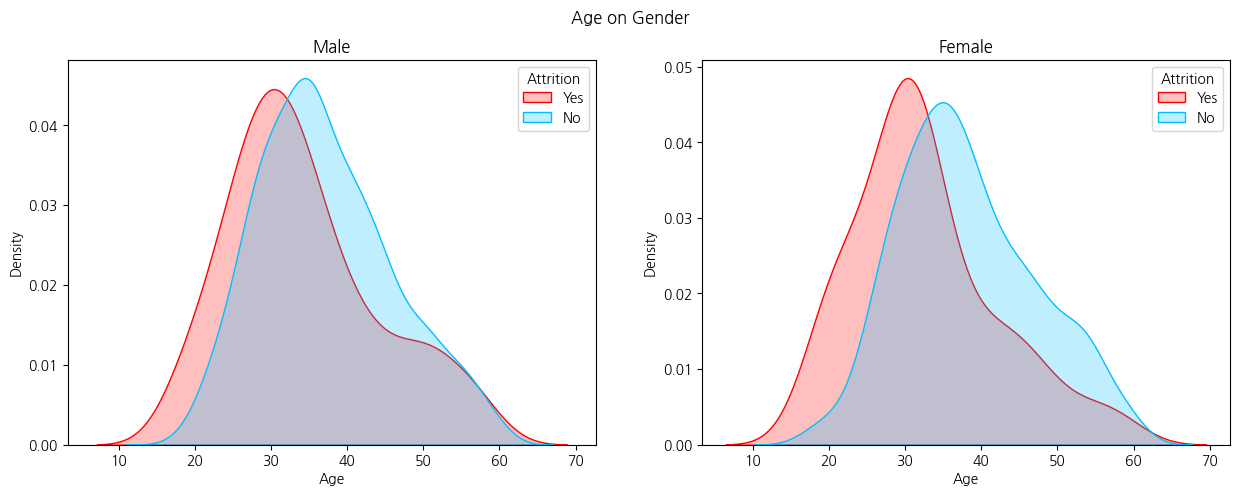

In [120]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Age on Gender')
sns.kdeplot(ax=axes[0],x=df_raw[(df_raw['Gender']=='Male')&(df_raw['Attrition']=='Yes')]['Age'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df_raw[(df_raw['Gender']=='Male')&(df_raw['Attrition']=='No')]['Age'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df_raw[(df_raw['Gender']=='Female')&(df_raw['Attrition']=='Yes')]['Age'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df_raw[(df_raw['Gender']=='Female')&(df_raw['Attrition']=='No')]['Age'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\1884555716.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\1884555716.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\1884555716.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




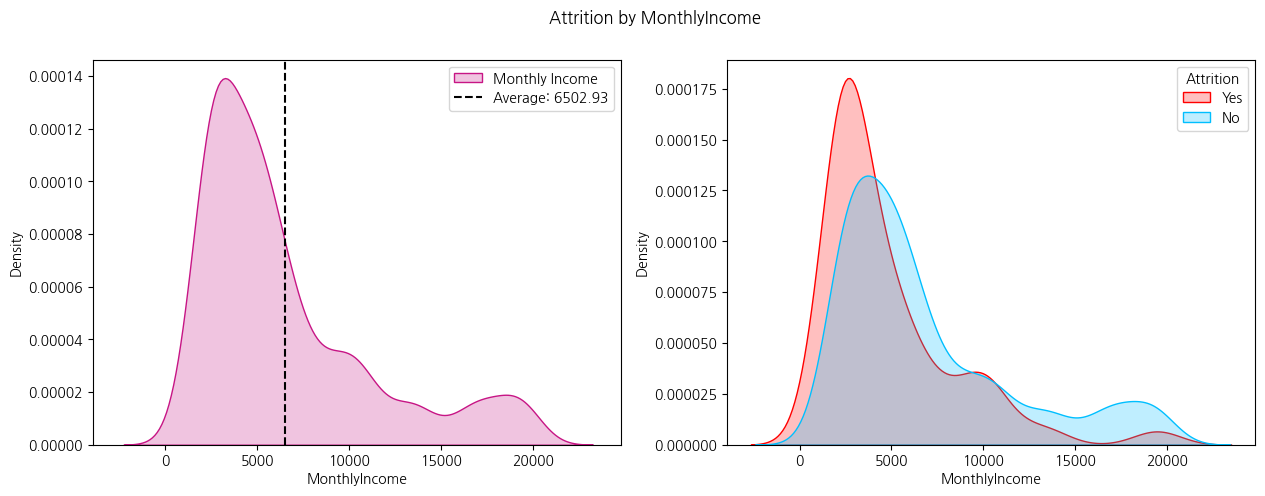

In [115]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition by MonthlyIncome')
sns.kdeplot(ax=axes[0],x=df_raw['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
# sns.kdeplot(ax=axes[0],x=df_raw['MonthlyIncome'].mean(),color='k',linestyle ="--")
axes[0].axvline(x=df_raw['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
axes[0].legend()
sns.kdeplot(ax=axes[1],x=df_raw[(df_raw['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df_raw[(df_raw['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[1].legend(title='Attrition')

In [93]:
fig=px.box(df_raw,x='OverTime',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> MonthlyIncome on OverTime</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [111]:
fig=px.box(df_raw,x='JobRole',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> MonthlyIncome on JobRole</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [109]:
fig=px.box(df_raw,x='JobInvolvement',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> MonthlyIncome on JobInvolvement</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [113]:
fig=px.box(df_raw,x='StockOptionLevel',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> MonthlyIncome on StockOptionLevel</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [112]:
fig=px.box(df_raw,x='JobRole',y='OverTime',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> OverTime on JobRole</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\3840926526.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\3840926526.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\3840926526.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\3840926526.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lucet\AppData\Local\Temp\ipykernel_21752\3840926526.py:11: FutureWarning:



`shade` is now

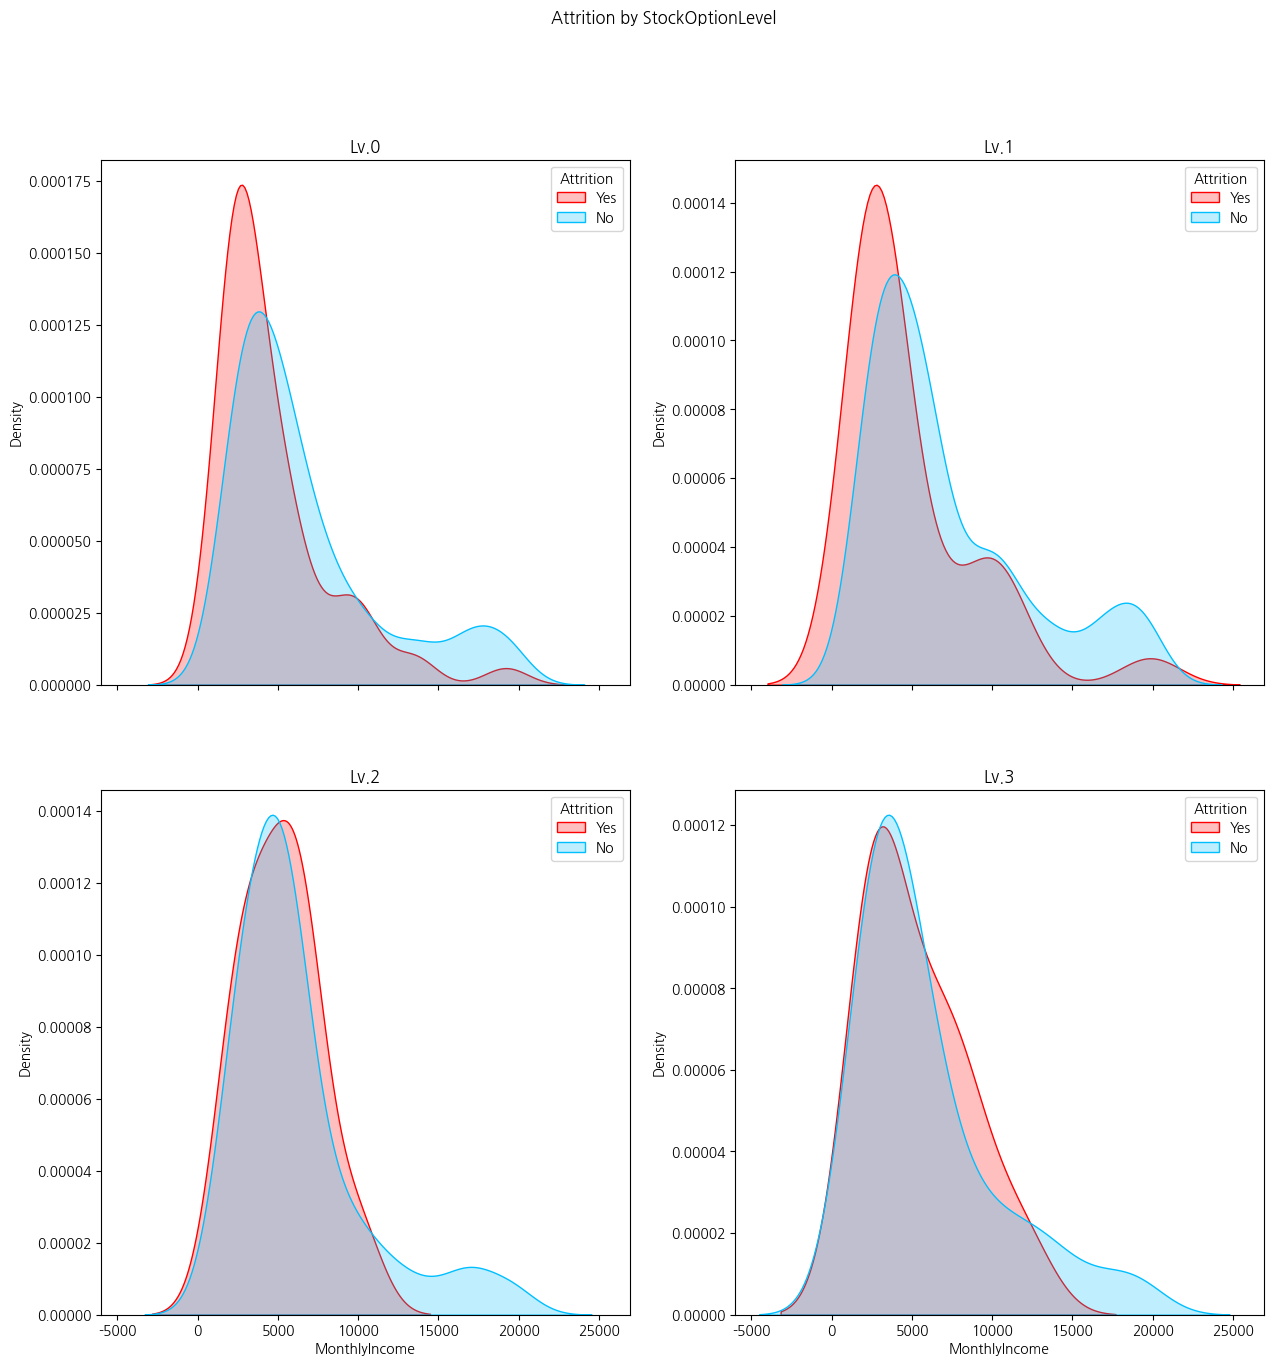

In [102]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,15))
fig.suptitle('Attrition by StockOptionLevel')
sns.kdeplot(ax=axes[0,0],x=df_raw[(df_raw['StockOptionLevel']==0)&(df_raw['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0,0],x=df_raw[(df_raw['StockOptionLevel']==0)&(df_raw['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[0,0].set_title('Lv.0')
axes[0,0].legend(title='Attrition')
sns.kdeplot(ax=axes[0,1],x=df_raw[(df_raw['StockOptionLevel']==1)&(df_raw['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0,1],x=df_raw[(df_raw['StockOptionLevel']==1)&(df_raw['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[0,1].set_title('Lv.1')
axes[0,1].legend(title='Attrition')
sns.kdeplot(ax=axes[1,0],x=df_raw[(df_raw['StockOptionLevel']==2)&(df_raw['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1,0],x=df_raw[(df_raw['StockOptionLevel']==2)&(df_raw['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[1,0].set_title('Lv.2')
axes[1,0].legend(title='Attrition')
sns.kdeplot(ax=axes[1,1],x=df_raw[(df_raw['StockOptionLevel']==3)&(df_raw['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1,1],x=df_raw[(df_raw['StockOptionLevel']==3)&(df_raw['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[1,1].set_title('Lv.3')
axes[1,1].legend(title='Attrition')
plt.show()

In [110]:
fig=px.box(df_raw,x='JobInvolvement',y='OverTime',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;"> Overtime on JobInvolvement</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()